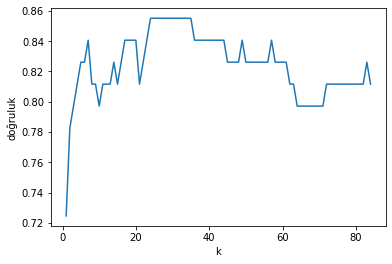

knn_score 0.8405797101449275
knn f1 score:  0.8253968253968254
KNN Precision:  0.8387096774193549
svm score: 0.855072463768116
svm f1 score:  0.84375
SVM Precision:  0.84375
dt score: 0.6521739130434783
dt f1 score:  0.6129032258064516
DT Precision:  0.6333333333333333


C:\Users\Esra\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rf score: 0.37918065878378393
rf f1 score:  0.6984126984126984
RF Precision:  0.7096774193548387


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor


df=pd.read_csv("proc_heart_cleve_3_withheader.csv")
##veri ön analiz
#print(df.head())
#print(df.dtypes)
#print(df.info()) #eksik verimiz yok
#print(df.describe()) 
#print(df.isnull()) #silmemiz gereken missing value yok.
#print(df.isnull().sum().sum())
#print(df.duplicated()) #tekrarlı verimiz yok.
#print(df["Max_heart_rate"].mean())
#print(df["Max_heart_rate"].std())
#print(np.median(df["Max_heart_rate"]))




df["Disease"] = df["Disease"].replace(-1,0) #-1 değerlerini 0 yaptım.


features = [['Serum_cholest', 'Max_heart_rate', 'Age', 'resting_BP', 'ST_dep_by_exerc']]



for feature in features:
   df[feature]=(df[feature]-np.min(df[feature]))/(np.max(df[feature])-np.min(df[feature]))



x_data=df.drop(['Disease'],axis=1)
y=df['Disease'].values
    
x=x_data
    

x_train, x_test, y_train, y_test=train_test_split(x_data,y,test_size=0.23,random_state=1)






knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_score=knn.score(x_test,y_test)
f1_knn=f1_score(y_test,knn_pred)
precision_knn = precision_score(y_test, knn_pred)


score_list=[]

for each in range(1,85):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
plt.plot(range(1,85),score_list)
plt.xlabel("k")
plt.ylabel("doğruluk")
plt.show()



print("knn_score",knn.score(x_test,y_test))
print("knn f1 score: ",f1_knn)
print("KNN Precision: ",precision_knn)


svm=SVC(random_state=1)
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
svm_score=svm.score(x_test,y_test)
f1_svm=f1_score(y_test,svm_pred)
precision_svm = precision_score(y_test, svm_pred)


print("svm score:",svm.score(x_test,y_test))
print("svm f1 score: ",f1_svm)
print("SVM Precision: ",precision_svm)

dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_score=dt.score(x_test,y_test)
f1_dt=f1_score(y_test,dt_pred)
precision_dt = precision_score(y_test, dt_pred)

print("dt score:",dt.score(x_test,y_test))
print("dt f1 score: ",f1_dt)
print("DT Precision: ",precision_dt)


rf=RandomForestRegressor(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

rf_score=rf.score(x_test,y_test)
f1_rf=f1_score(y_test,rf_pred.round())
precision_rf =precision_score(y_test,rf_pred.round())

print("rf score:",rf.score(x_test,y_test))
print("rf f1 score: ",f1_rf)
print("RF Precision: ",precision_rf)
